# Data Analysis of "Value for money" flats

Name: Bryan Lim Heng Yi

Admin Number: P2204314

Diploma: Diploma in Computer Engineering

Class: DCPE/FT/2B/21

Module Class: EL/03


# Context: 

A close friend with above average income coming to work in Singapore for the next 8 to 10 years, and is trying to look for a place to stay. The location type of flats does not matter to him. The only thing that matters to him is that the flat is "value for money". "Value for money" refers to flats that have lots of amenities at a reasonable price. He also wants to find out whether buying or renting a flat would be better in the long run.

# Imports (Libraries)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc

# Data Sets


In [21]:
# genfromtext used to read csv file

# Resale Flat Prices from year 2017 onwards [https://data.gov.sg/dataset/resale-flat-prices]
resale_price = "resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
data_sale = np.genfromtxt(resale_price,dtype=['datetime64[D]','U15','U9','U4','U20','U20',int,'U20',int,'U50',int],
                      delimiter=',', names=True, missing_values=['na'],filling_values=0)

# Median Rent by Town and Flat Type [https://data.gov.sg/dataset/median-rent-by-town-and-flat-type]
rental_price = "median-rent-by-town-and-flat-type.csv"
data_rent = np.genfromtxt(rental_price,dtype=['U7', 'U20', 'U5', int],
                      delimiter=',',names=True, missing_values=['na', '-'], filling_values=0)

# HDB Property Information [https://data.gov.sg/dataset/hdb-property-information]
info = "hdb-property-information.csv"
data_info = np.genfromtxt(info,dtype=['U4','U50',int,int,'U1','U1','U1','U1','U1','U1','U3',int,int,int,int,int,int,int,int,int,int,int,int,int],
                          delimiter=',',names=True, missing_values=['na'],filling_values=0) 

# Analysis: Dataset 1 [Resale Price]

This data set shows the different resale prices of flats over 7 years (2017 - 2023)

The flats are classified by their town, flat type, storey range, floor area, flat model, lease commence date and remaining lease



In [22]:
print(f"There are {len(data_sale)} rows and {len(data_sale[0])} columns in this dataset.\n")
print(f"The names of the data are {data_sale.dtype.names}\n")
print(f"This dataset spans {len(np.unique(data_sale['month']))} months over 7 years.\n")

There are 154511 rows and 11 columns in this dataset.

The names of the data are ('month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price')

This dataset spans 77 months over 7 years.



# Analysis: Dataset 2 [Rental Price]

This dataset shows the different median rental price of flats over 18 years (2005 - 2022)

The data is classified in 4 columns: quarter, town, flattype and median rent.

The dataset needs to be cleaned as it is in quarters and not years, making it inconsistent with the other datasets

In [23]:
print(f"There are {len(data_rent)} rows and {len(data_rent[0])} columns in this dataset.\n")
print(f"The names of the data are {data_rent.dtype.names}\n")
print(f"This dataset spans {len(np.unique(data_rent['quarter']))} quarters over 18 years.\n")

There are 11121 rows and 4 columns in this dataset.

The names of the data are ('quarter', 'town', 'flat_type', 'median_rent')

This dataset spans 70 quarters over 18 years.



# Analysis: Dataset 3 [Property Information]

This data set shows the different amounts of amenities around different blocks of flats

This data is going to be used to compare the correlation between flat prices against the amount of amenities in the area.

This data set is not very useful in its current state as there are different rows for different amenities, making the data hard to work with when we want to compare amenities in general.

In addition to that, the town names are in abbreviated form, making it hard to compare with the other dataset which town names are in full. The town 'Tengah' ('TG') is also missing in the dataset.

Further more, the 4 and 5 room rental flats are classified as 'other_room_rental', meaning that we can do not know how many of each type is being rented. 

Hence I had to clean the data to colate all of the different amenities into 1 data as well as to change the town names from abbreviations to full forms.

Since there are different number of data to compare, we have to take an average count of amentities for each town/area.

This data set would be used in Graph _.

In [24]:
print(f"There are {len(data_info)} rows and {len(data_info[0])} columns in this dataset.\n")
print(f"The names of the data are {data_info.dtype.names}\n")
print(f"This data set covers {len(np.unique(data_info['bldg_contract_town']))} different areas of Singapore. \n")

There are 12674 rows and 24 columns in this dataset.

The names of the data are ('blk_no', 'street', 'max_floor_lvl', 'year_completed', 'residential', 'commercial', 'market_hawker', 'miscellaneous', 'multistorey_carpark', 'precinct_pavilion', 'bldg_contract_town', 'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental')

This data set covers 26 different areas of Singapore. 



# Working With Data set 2 (**Note**: Some of the manupilation of data is done together with plotting the graph)

### For Line Graph:
| **Problem** | **Solution** |
| ----------- | ----------- |
| Quarters need to be converted to years so that the number of rentals in that year and the price and be counted. | Iterate through the data set and finds each data with the corresponding year, storing the rental price and the the number of each year in lists.  |
| Needs to find average rent per year. | Took the 2 lists and calculated the average of each year.  |


In [51]:
# Arrays to store and calculate average median rent of all areas
year_total = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
count_year = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

# Arrays to store and calculate average median rent of Central Area
CA_year_total = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
CA_count_year = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

# Array of the years
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Iterating through data_rent to seperate data by year and to collect specific data for the central area
for i in range(len(data_rent)):
    if years[0] in data_rent['quarter'][i]:         
        if 'CENTRAL' in data_rent['town'][i]:           
            CA_year_total[0] += data_rent['median_rent'][i]         
            CA_count_year[0] += 1                                   
        year_total[0] += data_rent['median_rent'][i]    
        count_year[0] += 1
    elif years[1] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[1] += data_rent['median_rent'][i]
            CA_count_year[1] += 1
        year_total[1] += data_rent['median_rent'][i]
        count_year[1] += 1
    elif years[2] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[2] += data_rent['median_rent'][i]
            CA_count_year[2] += 1
        year_total[2] += data_rent['median_rent'][i]
        count_year[2] += 1
    elif years[3] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[3] += data_rent['median_rent'][i]
            CA_count_year[3] += 1
        year_total[3] += data_rent['median_rent'][i]
        count_year[3] += 1
    elif years[4] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[4] += data_rent['median_rent'][i]
            CA_count_year[4] += 1
        year_total[4] += data_rent['median_rent'][i]
        count_year[4] += 1
    elif years[5] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[5] += data_rent['median_rent'][i]
            CA_count_year[5] += 1
        year_total[5] += data_rent['median_rent'][i]
        count_year[5] += 1
    elif years[6] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[6] += data_rent['median_rent'][i]
            CA_count_year[6] += 1
        year_total[6] += data_rent['median_rent'][i]
        count_year[6] += 1
    elif years[7] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[7] += data_rent['median_rent'][i]
            CA_count_year[7] += 1
        year_total[7] += data_rent['median_rent'][i]
        count_year[7] += 1
    elif years[8] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[8] += data_rent['median_rent'][i]
            CA_count_year[8] += 1
        year_total[8] += data_rent['median_rent'][i]
        count_year[8] += 1
    elif years[9] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[9] += data_rent['median_rent'][i]
            CA_count_year[9] += 1
        year_total[9] += data_rent['median_rent'][i]
        count_year[9] += 1
    elif years[10] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[10] += data_rent['median_rent'][i]
            CA_count_year[10] += 1
        year_total[10] += data_rent['median_rent'][i]
        count_year[10] += 1
    elif years[11] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[11] += data_rent['median_rent'][i]
            CA_count_year[11] += 1
        year_total[11] += data_rent['median_rent'][i]
        count_year[11] += 1
    elif years[12] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[12] += data_rent['median_rent'][i]
            CA_count_year[12] += 1
        year_total[12] += data_rent['median_rent'][i]
        count_year[12] += 1  
    elif years[13] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[13] += data_rent['median_rent'][i]
            CA_count_year[13] += 1
        year_total[13] += data_rent['median_rent'][i]
        count_year[13] += 1
    elif years[14] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[14] += data_rent['median_rent'][i]
            CA_count_year[14] += 1
        year_total[14] += data_rent['median_rent'][i]
        count_year[14] += 1
    elif years[15] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[15] += data_rent['median_rent'][i]
            CA_count_year[15] += 1
        year_total[15] += data_rent['median_rent'][i]
        count_year[15] += 1
    elif years[16] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[16] += data_rent['median_rent'][i]
            CA_count_year[16] += 1
        year_total[16] += data_rent['median_rent'][i]
        count_year[16] += 1
    elif years[17] in data_rent['quarter'][i]:
        if 'CENTRAL' in data_rent['town'][i]:
            CA_year_total[17] += data_rent['median_rent'][i]
            CA_count_year[17] += 1
        year_total[17] += data_rent['median_rent'][i]
        count_year[17] += 1   
        

# Calculate average rent for the years
avg_rent = year_total / count_year

# Calculate average rent of Central Area
CA_avg_rent = CA_year_total / CA_count_year


# Working With Data set 3 (**Note**: Some of the manupilation of data is done together with plotting the graph)

### For Scatter Plot:
| **Probem** | **Solution** |
| ----------- | ----------- |
| Amenities are split into 4 caterogies, need to calculate average number per town | counts the number of amenities per block and calculates the average number of amenities per block for each town  |
| The town names in this data set are in abreviations while the other data sets have town names in full | Converts the abreviated town names to full using a dictionary |

### For Pie Chart:
| **Problem** | **Solution** |
| ----------- | ----------- |
| Need to find the average number of each type of flat | calculates the average number of each type of flat |
| The 4 room and 5 room rented flats are combined under 'other_room_rental' | Used the ratio of number of 4 and 5 room flats sold to extrapolate the number of 4 and 5 rooms rented (Explained further in Analysis of Pie Chart) |






In [26]:
# Dictionary for town for data_info
town = {
    "AMK" : "Ang Mo Kio",
    "BB" : "Bukit Batok",
    "BD" : "Bedok",
    "BH" : "Bishan",
    "BM" : "Bukit Merah",
    "BP" : "Bukit Panjang",
    "BT" : "Bukit Timah",
    "CCK" : "Choa Chu Kang",
    "CL" : "Clementi",
    "CT" : "Central Area",
    "GL" : "Geylang",
    "HG" : "Hougang",
    "JE" : "Jurong East",
    "JW" : "Jurong West",
    "KWN" : "Kallang/Whampoa",
    "MP" : "Marine Parade",
    "PG" : "Punggol",
    "PRC" : "Pasir Ris",
    "QT" : "Queenstown",
    "SB" : "Sembawang",
    "SGN" : "Serangoon",
    "SK" : "Sengkang",
    "TAP" : "Tampines",
    "TG" : "Tengah",
    "TP" : "Toa Payoh",
    "WL" : "Woodlands",
    "YS" : "Yishun", 
}

# Creating a new list to store the new data (amenities count)
amenities = []

# Create new list for the new town names
info_town_names = []

# Creates a new dictionary
average_amen = {}

# Creates a new list to calculate average amenities per town
avg = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Create a new list to count the number of each type of flats [2-room, 3-room, 4 and 5 room] for all areas
type_count = [0,0,0,0]

# Find the ratio of 4 room and 5 room so extrapolate the rental number as 4 and 5 room rental count is combined in the data
total_45 = sum(data_info["4room_sold"]) + sum(data_info["5room_sold"])
ratio4room = sum(data_info["4room_sold"])/total_45
ratio5room = sum(data_info["5room_sold"])/total_45

# Iterating through data_info
for i in range(len(data_info)):
    
# Counting the number of amenities for different blocks and stores data into the newly created list 
    x = 0
    if data_info["market_hawker"][i] == "Y":
        x += 1
    if data_info["miscellaneous"][i] == "Y":
        x += 1
    if data_info["multistorey_carpark"][i] == "Y":
        x += 1
    if data_info["precinct_pavilion"][i] == "Y":
        x += 1
    amenities.append(x)

# Convert town names from short form to full form and stores new names into new lis
    info_town_names.append(town[data_info['bldg_contract_town'][i]].upper())

# Calculate the total number of amenities in each town
    if data_info['bldg_contract_town'][i] == "AMK":
        avg[0] += x
        count[0] += 1
    elif data_info['bldg_contract_town'][i] == "BB":
        avg[1] += x
        count[1] += 1
    elif data_info['bldg_contract_town'][i] == "BD":
        avg[2] += x
        count[2] += 1
    elif data_info['bldg_contract_town'][i] == "BH":
        avg[3] += x
        count[3] += 1
    elif data_info['bldg_contract_town'][i] == "BM":
        avg[4] += x
        count[4] += 1
    elif data_info['bldg_contract_town'][i] == "BP":
        avg[5] += x
        count[5] += 1
    elif data_info['bldg_contract_town'][i] == "BT":
        avg[6] += x
        count[6] += 1
    elif data_info['bldg_contract_town'][i] == "CCK":
        avg[7] += x
        count[7] += 1
    elif data_info['bldg_contract_town'][i] == "CL":
        avg[8] += x
        count[8] += 1
    elif data_info['bldg_contract_town'][i] == "CT":
        avg[9] += x
        count[9] += 1
    elif data_info['bldg_contract_town'][i] == "GL":
        avg[10] += x
        count[10] += 1
    elif data_info['bldg_contract_town'][i] == "HG":
        avg[11] += x
        count[11] += 1
    elif data_info['bldg_contract_town'][i] == "JE":
        avg[12] += x
        count[12] += 1
    elif data_info['bldg_contract_town'][i] == "JW":
        avg[13] += x
        count[13] += 1
    elif data_info['bldg_contract_town'][i] == "KWN":
        avg[14] += x
        count[14] += 1
    elif data_info['bldg_contract_town'][i] == "MP":
        avg[15] += x
        count[15] += 1
    elif data_info['bldg_contract_town'][i] == "PG":
        avg[16] += x
        count[16] += 1
    elif data_info['bldg_contract_town'][i] == "PRC":
        avg[17] += x
        count[17] += 1
    elif data_info['bldg_contract_town'][i] == "QT":
        avg[18] += x
        count[18] += 1
    elif data_info['bldg_contract_town'][i] == "SB":
        avg[19] += x
        count[19] += 1
    elif data_info['bldg_contract_town'][i] == "SGN":
        avg[20] += x
        count[20] += 1
    elif data_info['bldg_contract_town'][i] == "SK":
        avg[21] += x
        count[21] += 1
    elif data_info['bldg_contract_town'][i] == "TAP":
        avg[22] += x
        count[22] += 1
    elif data_info['bldg_contract_town'][i] == "TG":
        avg[23] += x
        count[23] += 1
    elif data_info['bldg_contract_town'][i] == "TP":
        avg[24] += x
        count[24] += 1
    elif data_info['bldg_contract_town'][i] == "WL":
        avg[25] += x
        count[25] += 1
    elif data_info['bldg_contract_town'][i] == "YS":
        avg[26] += x
        count[26] += 1

# counts the number of each type of flats
    type_count[0] += data_info['2room_sold'][i] + data_info['2room_rental'][i]
    type_count[1] += data_info['3room_sold'][i] + data_info['3room_rental'][i]
    type_count[2] += data_info['4room_sold'][i] + int(data_info['other_room_rental'][i] * ratio4room)
    type_count[3] += data_info['5room_sold'][i] + int(data_info['other_room_rental'][i] * ratio5room)

# Calculates the average number and stores it in the dictionary (average_amen)
average_amen["ANG MO KIO"] = round(avg[0]/count[0],2)
average_amen["BUKIT BATOK"] = round(avg[1]/count[1],2)
average_amen["BEDOK"] = round(avg[2]/count[2],2)
average_amen["BISHAN"] = round(avg[3]/count[3],2)
average_amen["BUKIT MERAH"] = round(avg[4]/count[4],2)
average_amen["BUKIT PANJANG"] = round(avg[5]/count[5],2)
average_amen["BUKIT TIMAH"] = round(avg[6]/count[6],2)
average_amen["CHOA CHU KANG"] = round(avg[7]/count[7],2)
average_amen["CLEMENTI"] = round(avg[8]/count[8],2)
average_amen["CENTRAL AREA"] = round(avg[9]/count[9],2)
average_amen["GEYLANG"] = round(avg[10]/count[10],2)
average_amen["HOUGANG"] = round(avg[11]/count[11],2)
average_amen["JURONG EAST"] = round(avg[12]/count[12],2)
average_amen["JURONG WEST"] = round(avg[13]/count[13],2)
average_amen["KALLANG/WHAMPOA"] = round(avg[14]/count[14],2)
average_amen["MARINE PARADE"] = round(avg[15]/count[15],2)
average_amen["PUNGGOL"] = round(avg[16]/count[16],2)
average_amen["PASIR RIS"] = round(avg[17]/count[17],2)
average_amen["QUEENSTOWN"] = round(avg[18]/count[18],2)
average_amen["SEMBAWANG"] = round(avg[19]/count[19],2)
average_amen["SERANGOON"] = round(avg[20]/count[20],2)
average_amen["SENGKANG"] = round(avg[21]/count[21],2)
average_amen["TAMPINES"] = round(avg[22]/count[22],2)
average_amen["TENGAH"] = 0
average_amen["TOA PAYOH"] = round(avg[24]/count[24],2)
average_amen["WOODLANDS"] = round(avg[25]/count[25],2)
average_amen["YISHUN"] = round(avg[26]/count[26],2)


print(f"There are {amenities.count(0)} blocks with 0 amenities. \n")
print(f"There are {amenities.count(1)} blocks with 1 amenities. \n")
print(f"There are {amenities.count(2)} blocks with 2 amenities. \n")
print(f"There are {amenities.count(3)} blocks with 3 amenities. \n")
print(f"There are {amenities.count(4)} blocks with 4 amenities. \n")

# Get the town with the highest average number of amenities per block
key_list = list(average_amen.keys())
value_list = list(average_amen.values())




There are 8031 blocks with 0 amenities. 

There are 4453 blocks with 1 amenities. 

There are 164 blocks with 2 amenities. 

There are 26 blocks with 3 amenities. 

There are 0 blocks with 4 amenities. 



### Count the number of each type of flat in the chosen area [Central Area]

In [27]:
# Creates the list to store the data
ca_type_count = [0,0,0,0]

# Iterating through data_info
for i in range(len(data_info)):
#Checks if its Central Area
    if data_info['bldg_contract_town'][i] == "CT":
    # counts the number of each type of flats
        ca_type_count[0] += data_info['2room_sold'][i] + data_info['2room_rental'][i]
        ca_type_count[1] += data_info['3room_sold'][i] + data_info['3room_rental'][i]
        ca_type_count[2] += data_info['4room_sold'][i] + int(data_info['other_room_rental'][i] * ratio4room)
        ca_type_count[3] += data_info['5room_sold'][i] + int(data_info['other_room_rental'][i] * ratio5room)


# Graph 1: Flat Resale Price Distribution from 2017 Onwards (Histogram)

(array([8.4000e+01, 1.6310e+03, 6.3900e+03, 1.2244e+04, 1.5454e+04,
        1.7377e+04, 1.8464e+04, 1.7641e+04, 1.3075e+04, 1.2011e+04,
        8.8760e+03, 7.7870e+03, 5.2690e+03, 4.7810e+03, 3.4210e+03,
        2.9890e+03, 2.2340e+03, 1.7120e+03, 1.0820e+03, 8.6200e+02,
        3.9600e+02, 2.3700e+02, 1.4900e+02, 1.1900e+02, 7.7000e+01,
        6.2000e+01, 5.2000e+01, 1.5000e+01, 1.0000e+01, 1.0000e+01]),
 array([ 140000.,  182600.,  225200.,  267800.,  310400.,  353000.,
         395600.,  438200.,  480800.,  523400.,  566000.,  608600.,
         651200.,  693800.,  736400.,  779000.,  821600.,  864200.,
         906800.,  949400.,  992000., 1034600., 1077200., 1119800.,
        1162400., 1205000., 1247600., 1290200., 1332800., 1375400.,
        1418000.]),
 <BarContainer object of 30 artists>)

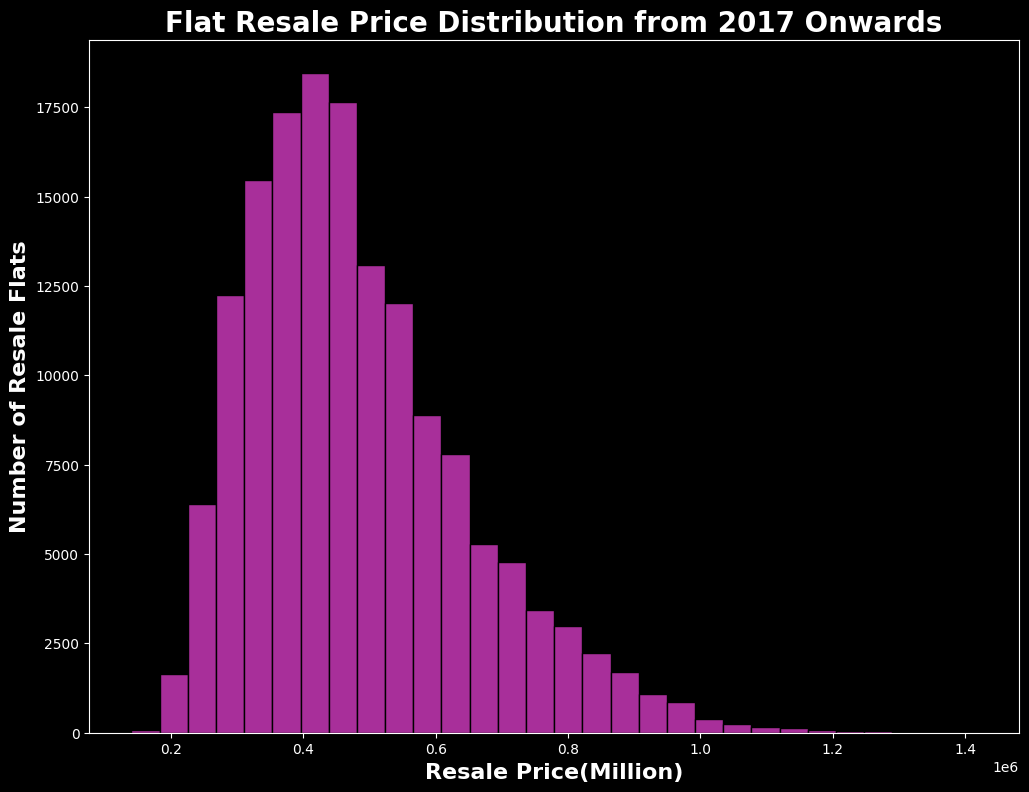

In [28]:
# Set the theme of the plots
plt.style.use('dark_background')

fig,hist = plt.subplots(figsize=(12,9))

# Set the color of the graph
hist_color = "#a82f9a"

# Set the title, x-axis label and y-axis label for the plot
hist.set_xlabel("Resale Price(Million)", fontsize=16, fontweight="bold" )
hist.set_ylabel("Number of Resale Flats", fontsize=16, fontweight="bold")
hist.set_title("Flat Resale Price Distribution from 2017 Onwards", fontsize=20, fontweight="bold")

# Plot the graph
hist.hist(data_sale["resale_price"], bins=30, edgecolor="black", color=hist_color )

# Analysis of Graph 1, Flat Resale Price Distribution from 2017 Onwards (Histogram):

The histogeam shows the distribution of the number of resale flats along the price.

We can see that the distribution of data is positively-skewed, meaning that the mean value of the data is greater than the median value of the data.

This shows us that most of the most of the resale flats are sold for around $0.4 million ($400,000).



# Graph 2:  Relationship between number of amenities per block and flat price. (Scatter Plot)

C:\Users\Bryan\AppData\Local\Temp\ipykernel_20384\1189606869.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(np.arange(0,1500000,200000))


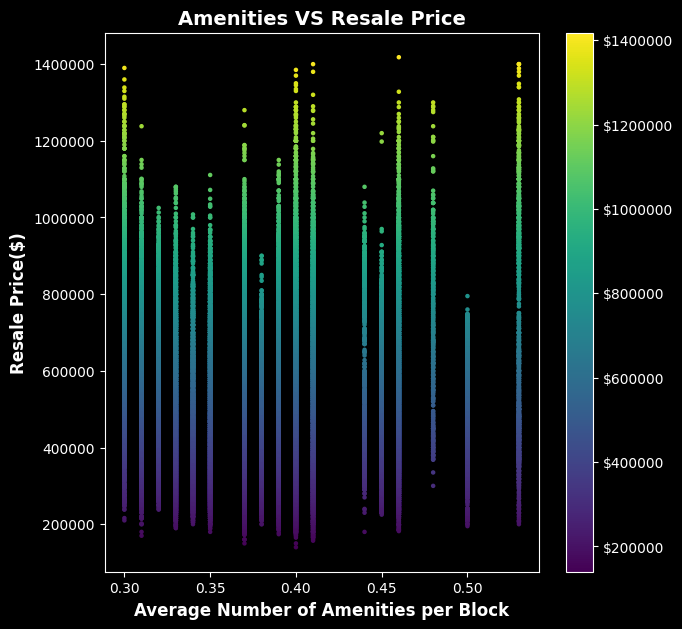

In [29]:
# Get 'resale_price' values and stores as integer type array
price = data_sale["resale_price"]

#get the amenities value for the data
val = []
for t in data_sale['town']:
    val.append(average_amen[t])

# Change the style of the figure
fig , ax3 = plt.subplots(figsize=(7,7))

# Creates the scatterplot
sc_plt = ax3.scatter(val,price,c=price,s=5)

# Sets the title, x-axis label and y-axis label
ax3.set_xlabel("Average Number of Amenities per Block", weight = 'bold', size = 12)
ax3.set_ylabel("Resale Price($)", weight = 'bold', size = 12)
ax3.set_title("Amenities VS Resale Price", weight = 'bold', size = 14)

# Sets the Y tick labels to integer from 0 to 15000000 with increments of 200000
ax3.set_yticklabels(np.arange(0,1500000,200000))

# Colorbar
plt.colorbar(sc_plt, format = '$%d')


# Analysis of Graph 2, Relationship between number of amenities per block and flat price. (Scatter Plot):

This scatter plot shows the relationship between the number of amenities against its resale price.

Generally, the more amenities around the flat, the higher the resale price. This plot indicates a moderate, positive, linear relationship between the number of amenities around the flat and the resale price of the flats.

From this plot, we can conclude that the price of the flats increases in value if more amenities are built around it, as the amenities makes it more convenient for the residents there.

Buyers may opt for houses with less amenities for a lower price or go for houses with more amenities at a higher price.

# Graph 3: Average amenities for each town


Legend:
AMK - ANG MO KIO
BB - BUKIT BATOK
BD - BEDOK
BH - BISHAN
BM - BUKIT MERAH
BP - BUKIT PANJANG
BT - BUKIT TIMAH
CCK - CHOA CHU KANG
CL - CLEMENTI
CT - CENTRAL AREA
GL - GEYLANG
HG - HOUGANG
JE - JURONG EAST
JW - JURONG WEST
KWN - KALLANG/WHAMPOA
MP - MARINE PARADE
PG - PUNGGOL
PRC - PASIR RIS
QT - QUEENSTOWN
SB - SEMBAWANG
SGN - SERANGOON
SK - SENGKANG
TAP - TAMPINES
TG - TENGAH
TP - TOA PAYOH
WL - WOODLANDS
YS - YISHUN



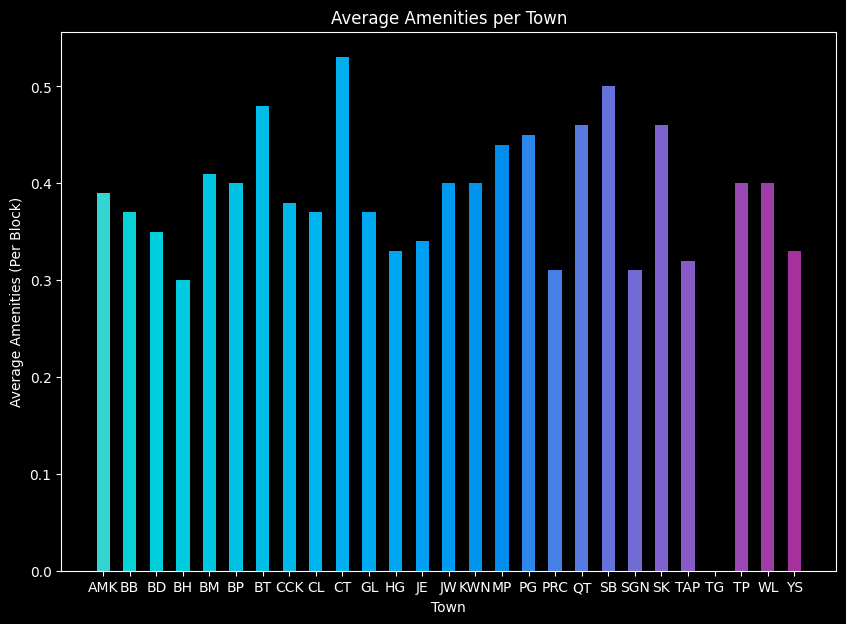

In [30]:
# Creates a list with the abreviated names to be used as labeles
shorttownlist = list(town.keys())

fig, bar1 = plt.subplots(figsize=(10,7))

# Setting the color of the bar chart
color = ['#33d5d3','#09d1d6','#00ceda','#00cadd','#00c6e1',
'#00c1e4','#00bde7','#00b8ea','#00b4ed','#00afef','#00aaf0','#00a5f1','#009ff1','#009af1','#0094ef','#008ded',
'#2c87ea','#4480e6','#5679e2','#6572dc','#726ad5','#7e62ce','#885ac5','#9150bc','#9947b2','#a03ca7','#a6309c']

# Setting the titles and the labels
bar1.set_title("Average Amenities per Town")
bar1.set_ylabel("Average Amenities (Per Block)")
bar1.set_xlabel("Town")

# Plotting the graph
bar1.bar(shorttownlist,value_list, 0.50, color=color, )

# Printing the Legend of the graph
print('''
Legend:
AMK - ANG MO KIO
BB - BUKIT BATOK
BD - BEDOK
BH - BISHAN
BM - BUKIT MERAH
BP - BUKIT PANJANG
BT - BUKIT TIMAH
CCK - CHOA CHU KANG
CL - CLEMENTI
CT - CENTRAL AREA
GL - GEYLANG
HG - HOUGANG
JE - JURONG EAST
JW - JURONG WEST
KWN - KALLANG/WHAMPOA
MP - MARINE PARADE
PG - PUNGGOL
PRC - PASIR RIS
QT - QUEENSTOWN
SB - SEMBAWANG
SGN - SERANGOON
SK - SENGKANG
TAP - TAMPINES
TG - TENGAH
TP - TOA PAYOH
WL - WOODLANDS
YS - YISHUN
''')

In [31]:
# print out the selected town (highest average amen)
print(f'''
The town with the highest average number of amenities is: {key_list[value_list.index(max(value_list))]} at {max(value_list)}. 
Hence the selected town is {key_list[value_list.index(max(value_list))]}.
''')


The town with the highest average number of amenities is: CENTRAL AREA at 0.53. 
Hence the selected town is CENTRAL AREA.



# Analysis of Graph 3, Average Amenities per Town (Bar Chart):

We can see from the graph that Tengah either does not exsist in this set of data or that the blocks in Tengah do not have any amenities nearby.

The area with the highest average number of amenities per block is the Central Area with 0.53 amenities per block.

Hence this is the selected area as we want the area with the highest number of amenities.

We will be doing further analysis on this selected area.

# Graph 4 and 5: Proportion of flat types (Pie Chart)

([<matplotlib.patches.Wedge at 0x209037026b0>,
 [Text(0.39632891190455266, 1.0261205550950403, '2 room'),
  Text(-1.1821504595553733, 0.20620448824654558, '3 room'),
  Text(0.703062473702497, -0.8459924101735936, '4 room'),
  Text(0.9666586996839401, 0.5249485292153452, '5 room')],
 [Text(0.21617940649339235, 0.559702120960931, '13.3%'),
  Text(-0.6895877680739677, 0.12028595147715157, '43.0%'),
  Text(0.38348862201954376, -0.46145040554923283, '34.6%'),
  Text(0.5272683816457855, 0.28633556139018823, '9.2%')])

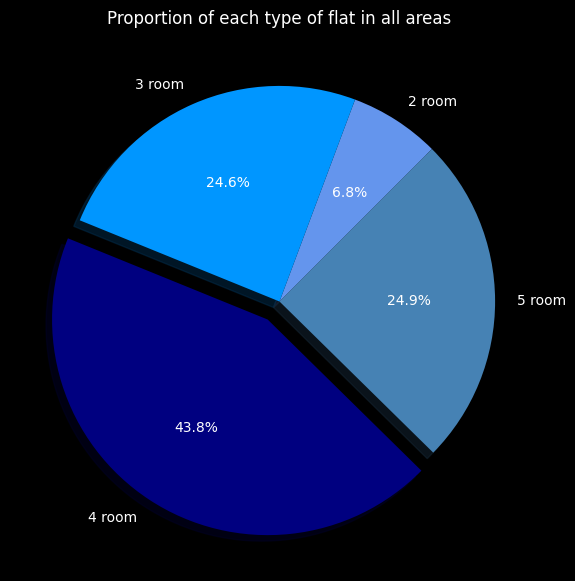

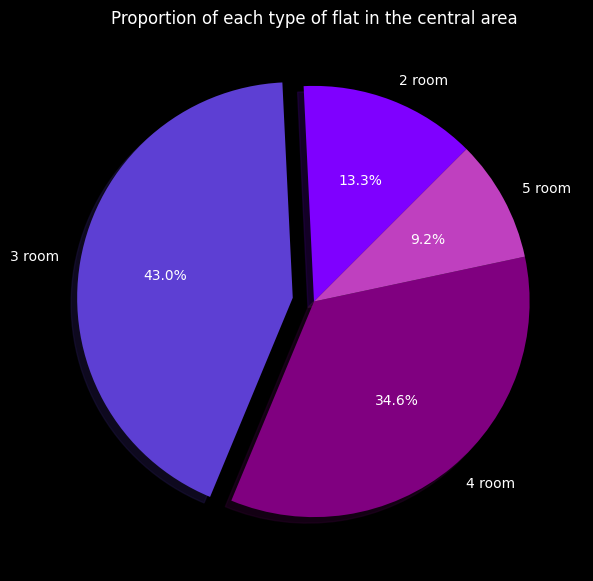

In [32]:
# Create the labels for each catergory of the pie chart
labels = ['2 room', '3 room', '4 room', '5 room']

# Extrude the portion with the highest ratio for both pie charts
extrude1 = [0,0,0,0]
extrude1[type_count.index(max(type_count))] = 0.1

extrude2 = [0,0,0,0]
extrude2[ca_type_count.index(max(ca_type_count))] = 0.1

# Configuring the colors of both pie chart
all_color = ['#6495ED','#0096FF','#000080','#4682B4']

ca_color = ['#7F00FF','#5D3FD3','#800080','#BF40BF']

# Configure the size of the displays
fig , pie_plt = plt.subplots(figsize=(7,7))
fig2 , pie_plt2 = plt.subplots(figsize=(7,7))

# Creating the title of the both plots
pie_plt.set_title("Proportion of each type of flat in all areas")
pie_plt2.set_title("Proportion of each type of flat in the central area")

# Plotting the Pie Chart (All Towns)
pie_plt.pie(type_count, labels=labels, autopct='%1.1f%%', startangle=45, shadow=True, colors=all_color, explode=extrude1)

# PLotting the Pie Chart (Central Area)
pie_plt2.pie(ca_type_count, labels=labels, autopct='%1.1f%%', startangle=45, shadow=True, colors=ca_color, explode=extrude2)



# Analysis of Graph 4 and 5, Proportion of flat types (Pie Chart):

Since the data had combined the number of 4 room rented and 5 room rented under 'other_room_rental', the data had to be extrapolated using the ratio of number of 5 rooms sold and the ratio of number of 4 room sold. This is done by calculating the sum of '4room_sold' and '5room_sold' and taking each value over the total. The ratio is then used to split the 'other_room_rental' to 4 room and 5 room. This is shown above in "Cleaning data set 3".

In the first plot, the proportion of 4 room flats is the highest. However, in the second plot, the proportion of 3 room flats is the highest.



# Graph 6: Rental Price Trends (Line Graph)

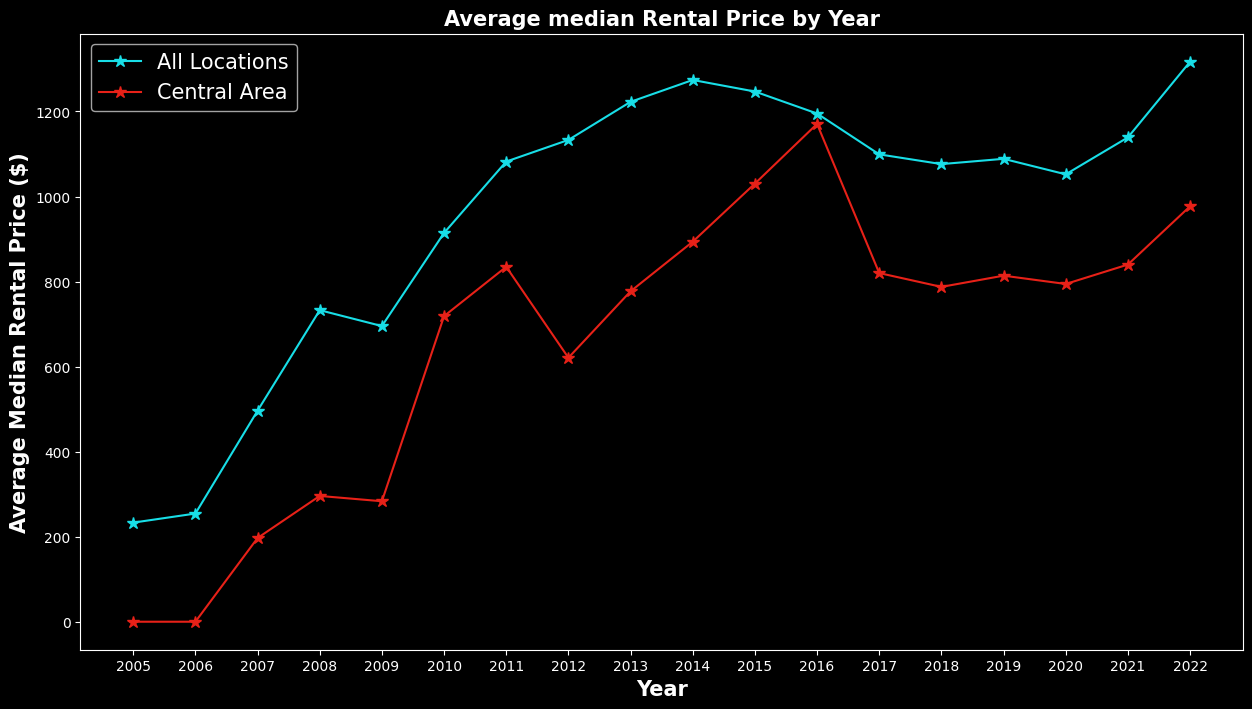

In [50]:
fig, line_plt = plt.subplots(figsize=(15,8))

#Plotting line
line_plt.plot(years,avg_rent, marker='*',markersize= 9, color="#18DEE7")
line_plt.plot(years,CA_avg_rent, marker='*',markersize= 9, color="#E72118")

# Creating the labels in the graphs
line_plt.set_ylabel("Average Median Rental Price ($)",weight='bold',size=15)
line_plt.set_xlabel("Year",weight='bold',size=15)
line_plt.set_title("Average median Rental Price by Year",weight='bold',size=15)

#Show legend
line_plt.legend(["All Locations", "Central Area"],loc=2,prop={'size': 15})


# Analysis of Graph 6, Rental Price Trends (Line Graph):

The X-axis of the graph is the year from 2005 to 2022, and the Y-axis is the average median rental price of each year.

This plot shows the line for all locations as well as the central area

From the line graphs, it can be seen that the average median price rental price of flats have been increasing from 2005 to 2022.

There is an increase in average median rental price of $43 from 2014 to 2022 (8 years). We can use this data to predict the rental price for the coming 8 years. [ increase of $4.25 per year ]

We use the data for all areas instead of just using data from Central Area as it depicts the rental market as a whole.







# Graph 7: Total sum of rent per year for each available flat type in Central Area (Bar Graph)

There is only 3 room and 4 room rental in the Central Area


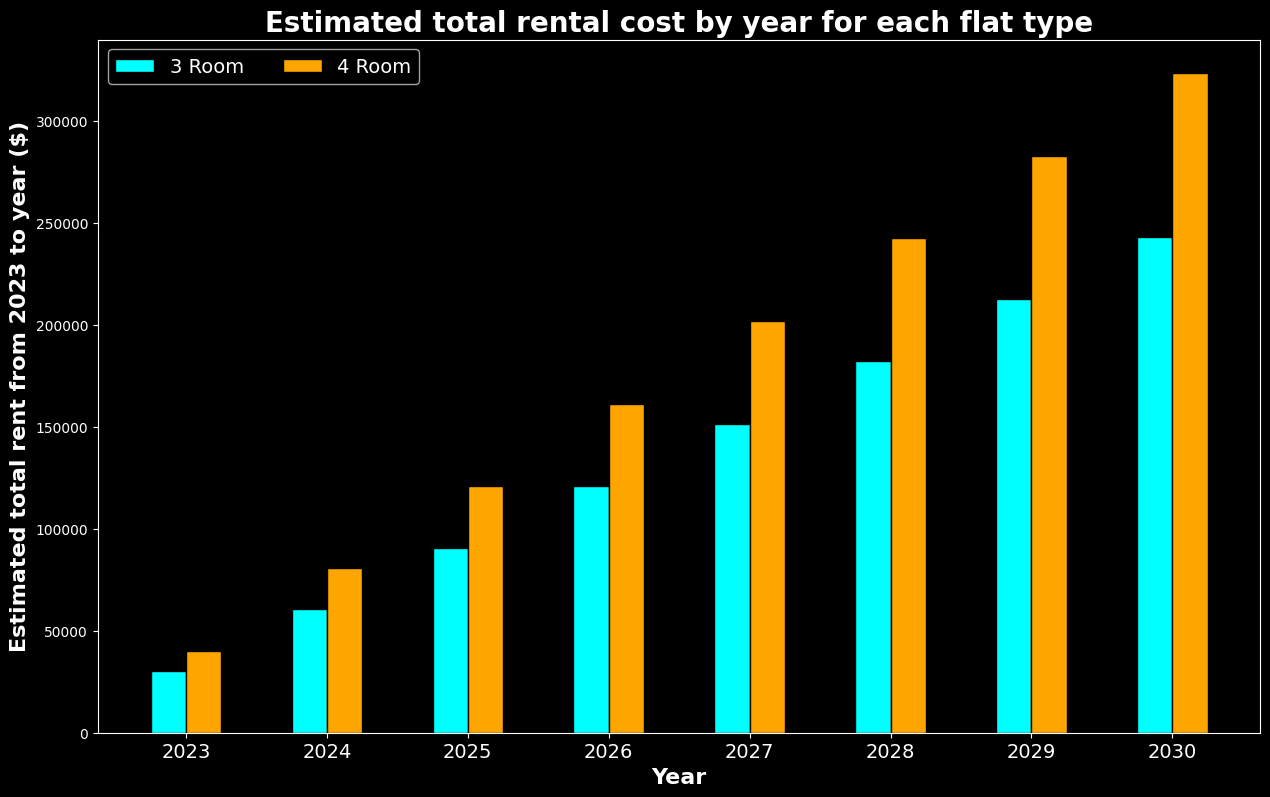

In [34]:
# Creates a 2 new arrays to store rental prices in the Central Area in 2022
CT_flatTypeCount2022 = np.array([0,0,0,0])
CT_flatTypeRent2022 = np.array([0,0,0,0])

# Iterates through the data rent
for i in range(len(data_rent)):
    
    # Check if it is data from 2022
    if "2022" in data_rent["quarter"][i]:

        # Check if it is data from Central Area
        if "CENTRAL" in data_rent["town"][i]:

            # Check if it is 2 room
            if data_rent["flat_type"][i] == "2-RM":
                CT_flatTypeRent2022[0] += data_rent["median_rent"][i]
                CT_flatTypeCount2022[0] += 1

            # Check if it is 3 room
            elif data_rent["flat_type"][i] == "3-RM":
                CT_flatTypeRent2022[1] += data_rent["median_rent"][i]
                CT_flatTypeCount2022[1] += 1
            
            # Check if it is 4 room
            elif data_rent["flat_type"][i] == "4-RM":
                CT_flatTypeRent2022[2] += data_rent["median_rent"][i]
                CT_flatTypeCount2022[2] += 1

            # Check if it is 5 room
            elif data_rent["flat_type"][i] == "5-RM":
                CT_flatTypeRent2022[3] += data_rent["median_rent"][i]
                CT_flatTypeCount2022[3] += 1

# Calculate the average of each flat type
CT_flatTypeAvgRent2022 = CT_flatTypeRent2022/CT_flatTypeCount2022

print("There is only 3 room and 4 room rental in the Central Area")

# Calculate the predicted rental price for each following year based on data from graph 3 (line graph)
starting_rent_3rm = CT_flatTypeAvgRent2022[1]
starting_rent_4rm = CT_flatTypeAvgRent2022[2]
increment = 4.25
sum_3rm = 0
sum_4rm = 0
array_3rm = []
array_4rm = []

for i in range(1,9):
    sum_3rm += (starting_rent_3rm + (increment * i)) * 12
    array_3rm.append(int(sum_3rm))
    sum_4rm += (starting_rent_4rm + (increment * i)) * 12
    array_4rm.append(int(sum_4rm))


# Create year tuple for the x-axis of the graph
year = (2023,2024,2025,2026,2027,2028,2029,2030)

# Stores the data into dictionary so that it can be shown together in 1 plot
rent_dict = {
    "3 room": array_3rm,
    "4 room": array_4rm,
}

x = np.arange(len(year))
width = 0.25  # the width of the bars


fig,bar2 = plt.subplots(figsize=(15,9))

# Plotting the graph
bar2.bar(x+(width-0.125), rent_dict['3 room'], width, color='cyan', edgecolor="black")
bar2.bar(x+(width+0.125), rent_dict['4 room'], width, color='orange', edgecolor="black")

# Set the title, x-axis label and y-axis label of the plot
bar2.set_xlabel("Year", fontsize=16, fontweight="bold")
bar2.set_ylabel("Estimated total rent from 2023 to year ($)", fontsize=16, fontweight="bold")
bar2.set_title('Estimated total rental cost by year for each flat type', fontsize=20, fontweight="bold")

# Set the ticks for each year
bar2.set_xticks(x + width, year, fontsize=14)

# Display the legend of the plot
bar2.legend(["3 Room", "4 Room"], loc='upper left', ncols=2, fontsize=14)


# Analysis of Total sum of rent per year for each available flat type in Central Area (Bar Graph):

We can see that renting a 4 room flat is significantly more expensive than renting a 3 room flat by around 33%

This data will be used in the following graph when comparing the cost buying a flat and renting a flat to determine whether it is better to buy or rent a flat for 8 to 10 years

# Graph 8: Comparison of total price after 8 years, sold vs rented (Bar Graph)

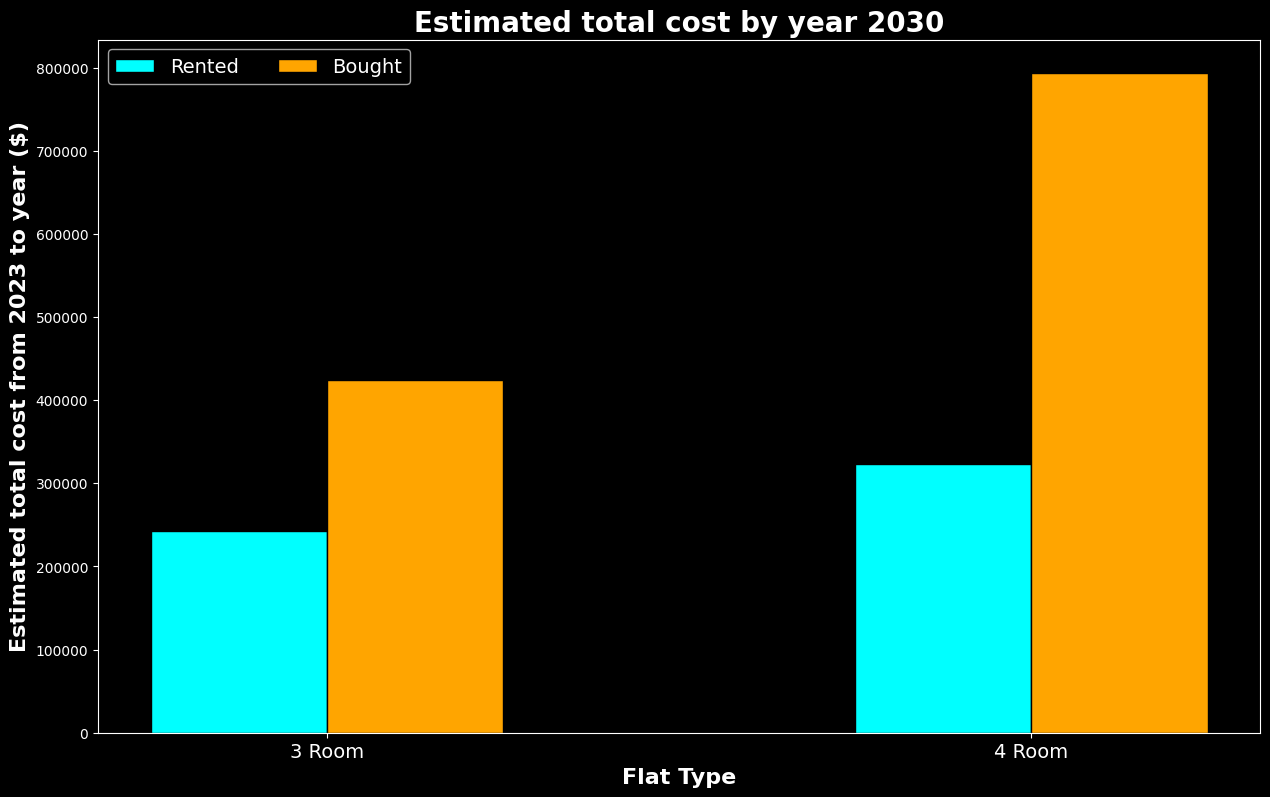

In [52]:
# Variables used to calculate the average price 3 room flat sold in Central Area
CT_sold_price_3rm = 0
CT_sold_count_3rm = 0

# Variables used to calculate the average price 4 room flat sold in Central Area
CT_sold_price_4rm = 0
CT_sold_count_4rm = 0

# Iterate through data_sale
for i in range(len(data_sale)):
    if "CENTRAL AREA" in data_sale['town'][i]:
        if data_sale['flat_type'][i] == "3 ROOM":
            CT_sold_price_3rm += data_sale['resale_price'][i]
            CT_sold_count_3rm += 1
        elif data_sale['flat_type'][i] == "4 ROOM":
            CT_sold_price_4rm += data_sale['resale_price'][i]
            CT_sold_count_4rm += 1

# Calculate the average resale price of 3 room flat in Central Area    
CT_sold_avg_3rm = CT_sold_price_3rm/CT_sold_count_3rm

# Calculate the average resale price of 4 room flat in Central Area
CT_sold_avg_4rm = CT_sold_price_4rm/CT_sold_count_4rm

# Stores the data used for the plot in a dictionary
price_dict = {
    "Rented" : [array_3rm[-1], array_4rm[-1]],
    "Bought" : [CT_sold_avg_3rm, CT_sold_avg_4rm],
}

# Configure the x-axis label 
xlabels = ("3 Room", "4 Room")

x = np.arange(len(xlabels))
width = 0.25  # the width of the bars

fig,bar3 = plt.subplots(figsize=(15,9))

# Plots the graphs
bar3.bar(x+(width-0.125), price_dict['Rented'], width, color='cyan', edgecolor="black")
bar3.bar(x+(width+0.125), price_dict['Bought'], width, color='orange', edgecolor="black")

# Sets the title, x-axis label and y-axis label for the graph
bar3.set_xlabel("Flat Type", fontsize=16, fontweight="bold")
bar3.set_ylabel("Estimated total cost from 2023 to year ($)", fontsize=16, fontweight="bold")
bar3.set_title('Estimated total cost by year 2030', fontsize=20, fontweight="bold")

# Sets the ticks for each flat type
bar3.set_xticks(x+width , xlabels, fontsize=14)

# Shows the legend
bar3.legend(["Rented", "Bought"], loc='upper left', ncols=2, fontsize=14)

# Analysis of Graph 8, Comparison of total price after 8 years, sold vs rented (Bar Graph):

We can tell from the bar graph that it is better way cheaper to rent a flat than to buy a flat for both types of flats.

It would take a long time for buying a flat to be cheaper than renting as the difference in cost is way too big.


# Conclusion: 
From the data, my close friend should **rent** a flat in the **Central Area** as it it has the highest average number of amenities per block, and renting would be way cheaper than buying a flat. The flat in the central area is the most value for money as it has the most number of amenities.